In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline as plt
import requests
from bs4 import BeautifulSoup
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 1: Importing Files

###### First, I will import the twitter_archive_enhanced.csv. I will name it werate_df. Then, I will take a glance at the data structure and values.

In [2]:
werate_df = pd.read_csv("/Users/adedayo/Desktop/ALX-T/Project 2/twitter-archive-enhanced.csv")

werate_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


The werate_df data contains a number of interesting information such as tweet_id, timestamp, rating_numerator, rating_denominator, name. Also, there are some column headers which has unclear meaning such as doggo, floofer, pupper, puppo. However, this data doesnt seem to contain certain important information such as those who liked/favorited the tweets.

##### Next, I will import the image_predictions.tsv file using the Requests library. I will name it image_predictions

In [3]:
# Downloading the image file programmatically using the Requests library:

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url, allow_redirects = True)

open('image_predictions','wb').write(response.content)

335079

In [4]:
image_predictions = pd.read_csv('image_predictions',index_col = False,sep="\t")

image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


The image predictions data contains 3 breeds predictions(p1, p2, p3) with different probability. Notably, each prediction contain specific tweet_id which makes it easy to join with the werate_df data. 

### Next, I will gather data using the Twitter API to get information on each tweet's number of likes / favorite counts using the Tweepy python library. I will then save the returned JSON as a new txt file named tweet_json.txt.

In [5]:
consumer_key = 'LRcN46e6TGZ0ZL6ST4IEmh68U'
consumer_secret = '7hqn3Hn8RmRs2xYAVtd2a8NYFpl9PGcDJkM0P0EAvjndVNU8qa'
access_token = '1563858606142922753-VsRKZ5tdVALmCkAz9q98Nd7zitk1Qm'
access_secret = '0WKDxVMRoRO1XFBn46usuwiMOpSQHRts7YxxhDmiJz9uC'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = werate_df.tweet_id.values

count = 0
tweet_df = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except BaseException as e:
            print("Fail")
            tweet_df[tweet_id] = e
            pass
end = timer()
print(end - start)
print(tweet_df)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 773


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Rate limit reached. Sleeping for: 774


Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
18

##### A total of 2,356 data was succesfully gathered from the Twitter API. I will name the gathered data tweet_json.txt as tweet_Data and read it as a dataframe.

In [6]:
tweet_Data = pd.read_json('tweet_json.txt', lines=True)

tweet_Data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


## STEP 2: ASSESSMENT

In [7]:
werate_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
werate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
werate_df.sum().duplicated()

/var/folders/hz/9hfb8zks6yv2jbwj53fz4hcm0000gn/T/ipykernel_45252/280679175.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  werate_df.sum().duplicated()


tweet_id                    False
in_reply_to_status_id       False
in_reply_to_user_id         False
timestamp                   False
source                      False
text                        False
retweeted_status_id         False
retweeted_status_user_id    False
rating_numerator            False
rating_denominator          False
name                        False
doggo                       False
floofer                     False
pupper                      False
puppo                       False
dtype: bool

In [10]:
werate_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
werate_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [15]:
image_predictions.sum().duplicated()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [16]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
tweet_Data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [18]:
tweet_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [19]:
tweet_Data.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 270
source                              0
in_reply_to_status_id            2250
in_reply_to_status_id_str        2250
in_reply_to_user_id              2250
in_reply_to_user_id_str          2250
in_reply_to_screen_name          2250
user                                0
geo                              2327
coordinates                      2327
place                            2326
contributors                     2327
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                132
possibly_sensitive_appealable     132
lang        

In [20]:
tweet_Data.sum().duplicated()

/var/folders/hz/9hfb8zks6yv2jbwj53fz4hcm0000gn/T/ipykernel_45252/1820048978.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tweet_Data.sum().duplicated()


id                               False
id_str                           False
full_text                        False
truncated                        False
display_text_range               False
source                           False
in_reply_to_status_id            False
in_reply_to_status_id_str         True
in_reply_to_user_id              False
in_reply_to_user_id_str           True
geo                               True
coordinates                       True
contributors                      True
is_quote_status                  False
retweet_count                    False
favorite_count                   False
favorited                         True
retweeted                         True
possibly_sensitive                True
possibly_sensitive_appealable     True
lang                             False
quoted_status_id                 False
quoted_status_id_str              True
dtype: bool

In [21]:
tweet_Data.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 270
source                              0
in_reply_to_status_id            2250
in_reply_to_status_id_str        2250
in_reply_to_user_id              2250
in_reply_to_user_id_str          2250
in_reply_to_screen_name          2250
user                                0
geo                              2327
coordinates                      2327
place                            2326
contributors                     2327
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                132
possibly_sensitive_appealable     132
lang        

In [22]:
tweet_Data[['possibly_sensitive', 'possibly_sensitive_appealable']].sample(10)

,possibly_sensitive,possibly_sensitive_appealable
920,0.0,0.0
1435,0.0,0.0
45,0.0,0.0
17,0.0,0.0
270,0.0,0.0
805,NaN,NaN
2036,0.0,0.0
377,0.0,0.0
1133,0.0,0.0
653,0.0,0.0


In [23]:
werate_df.sum().duplicated()

/var/folders/hz/9hfb8zks6yv2jbwj53fz4hcm0000gn/T/ipykernel_45252/280679175.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  werate_df.sum().duplicated()


tweet_id                    False
in_reply_to_status_id       False
in_reply_to_user_id         False
timestamp                   False
source                      False
text                        False
retweeted_status_id         False
retweeted_status_user_id    False
rating_numerator            False
rating_denominator          False
name                        False
doggo                       False
floofer                     False
pupper                      False
puppo                       False
dtype: bool

In [24]:
image_predictions.sum().duplicated()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

### Tidyness Issues:
1.	Information about one type of observation unit (tweets) is spread across three different datasets. Given that these three datasets are part of the same observational unit, they need to be merged for effective analysis.
2.	Dog stages should be a single column rather than having the dog stage values (i.e., doggo, pupper, floofer and puppo) as columns

### Quality Issues:
1.	p1, p2, and p3 are columns from the Image Prediction Data that contain variables that describe the three types of dog breeds for the dogs in the dataset. Dog breed should be a single column that matches each dog breed variable to individual dogs in the dataset.
2.	Too many missing values: Some columns contain too many missing values e.g., retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id_str, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, retweeted_status, quoted_status_id, etc. Many of these columns may have to be dropped for good analysis.
3.	Duplicate columns: Some columns are duplicates. e.g., source_x and source_y, text and full_text, created_at and timestamp, etc.
4.	Incorrect data type:  Timestamp is wrongly assigned as a string datatype. It needs to be converted to Datetime.
5.	Poor column names: Some columns need to be renamed to properly reflect their meanings e.g., source_basic needs to be renamed as tweet_source, timestamp to tweet_date, expanded_urls to tweet_urls, name to dog_name, id to tweet_id, etc.
6.	 Duplicate rows: There are cases of duplicate rows in the tweet_Data dataset. Duplicate rows may also occur after merging the three datasets. One of the duplicates needs to be dropped to prevent redundancy during analysis.
7.	Wrong values: The name column contains some wrong dog name values such as ‘such’, ‘a’, ‘quite’, ‘one’, ‘my’, ‘his’, ‘not’, ‘getting’, ‘unacceptable’, ‘an’, ‘very’, ‘just’, ‘all’, ‘officially’, etc. These names need to be dropped. 
8.	Unique tweet sources need to be extracted from the source column. 
9. Ratings with decimal values incorrectly extracted
10. Drop columns not useful to the analysis.


# STEP 3: CLEANING

#### Before cleaning, I will make copies of the three datasets.

In [25]:
werate_df_copy = werate_df.copy()

tweet_Data_copy = tweet_Data.copy()

image_predictions_copy = image_predictions.copy()

## Define:

### Tidyness Issue 1

The doggo, fluffer, pupper, poppo should be on one column. 

### Code

In [26]:
# CODE

# Rplace None in the dog stage columns with empty string as follows
werate_df_copy.doggo.replace('None', '', inplace=True)
werate_df_copy.floofer.replace('None', '', inplace=True)
werate_df_copy.pupper.replace('None', '', inplace=True)
werate_df_copy.puppo.replace('None', '', inplace=True)

# Combine the dog stage columns
werate_df_copy['dog_stage'] = werate_df_copy.doggo + werate_df_copy.floofer + werate_df_copy.pupper + werate_df_copy.puppo


# Then format rows with multiple dog stages which appeared like doggopuppo
werate_df_copy.loc[werate_df_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
werate_df_copy.loc[werate_df_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
werate_df_copy.loc[werate_df_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

In [27]:
werate_df_copy.dog_stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [28]:
# Drop the old columns
werate_df_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#  Use np.nan to fill the empty spaces
werate_df_copy['dog_stage'] = werate_df_copy['dog_stage'].replace('', np.nan)

In [29]:
werate_df_copy.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

### Testing

In [30]:
werate_df_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN


### Define

#### Quality Issue 1:

Remove columns containing too many missing values from each dataset.

### Code

In [31]:
werate_df_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
               'retweeted_status_timestamp'], axis = 1, inplace = True)

In [32]:
tweet_Data_copy.drop(['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str',
                       'in_reply_to_screen_name','geo','coordinates','place','contributors','retweeted_status',
                       'quoted_status_id','quoted_status_id_str','quoted_status_permalink','quoted_status'], axis = 1,
                      inplace = True)

### Testing

In [33]:
werate_df_copy.isnull().sum(), image_predictions_copy.isnull().sum(), tweet_Data_copy.isnull().sum()

(tweet_id                 0
 timestamp                0
 source                   0
 text                     0
 expanded_urls           59
 rating_numerator         0
 rating_denominator       0
 name                     0
 dog_stage             1976
 dtype: int64,
 tweet_id    0
 jpg_url     0
 img_num     0
 p1          0
 p1_conf     0
 p1_dog      0
 p2          0
 p2_conf     0
 p2_dog      0
 p3          0
 p3_conf     0
 p3_dog      0
 dtype: int64,
 created_at                         0
 id                                 0
 id_str                             0
 full_text                          0
 truncated                          0
 display_text_range                 0
 entities                           0
 extended_entities                270
 source                             0
 user                               0
 is_quote_status                    0
 retweet_count                      0
 favorite_count                     0
 favorited                          0
 retwe

### Define

#### Quality Issue 2:

p1, p2, and p3 are columns from the Image Prediction Data that contain variables that describe the three types of dog breeds for the dogs in the dataset. Dog breed should be a single column that matches each dog breed variable to individual dogs in the dataset.

### Code

In [34]:
def dog_breed(row):
    breed_conf = 0
    breed_name = ''
    is_breed = False
    if(row.p1_dog == True):
        if(row.p1_conf >= breed_conf):
            breed_conf = row.p1_conf
            breed_name = row.p1
            is_breed = True
    if(row.p2_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p2_conf
            breed_name = row.p2
            is_breed = True
    if(row.p3_dog == True):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p3_conf
            breed_name = row.p3
            is_breed = True
    if is_breed == False:
        return np.nan
    else:
        return breed_name      
    
image_predictions_copy['breed'] = image_predictions_copy.apply(dog_breed,axis=1)

In [35]:
image_predictions_copy.drop(columns=['p1','p2','p3','p1_dog','p2_dog','p3_dog','p1_conf', 'p2_conf', 'p3_conf'], axis = 1,
                    inplace=True)

### Testing

In [36]:
image_predictions_copy

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua


## Define


#### Quality Issue 3:
    
#####  Wrong values: 

The name column in the weRate_df contains some wrong dog name values such as ‘such’, ‘a’, ‘quite’, ‘one’, ‘my’, ‘his’, ‘not’, ‘getting’, ‘unacceptable’, ‘an’, ‘very’, ‘just’, ‘all’, ‘officially’, etc. These names need to be dropped.

I will fix the wrong names in the dataset by firstly checking names that are written in the lower case. Then, I will convert them to null values and drop them accordingly

### Code:

In [37]:
werate_df_copy[werate_df_copy.name.str.lower() == werate_df_copy.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [38]:
werate_df_copy[werate_df_copy.name.str.lower() == werate_df_copy.name].sample(10).text.tolist()

["This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX",
 '"Pupper is a present to world. Here is a bow for pupper." 12/10 precious as hell https://t.co/ItSsE92gCW',
 "There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7",
 'Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu',
 'This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe',
 "This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq",
 'This is life-changing. 12/10 https://t.co/SroTpI6psB',
 'This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9',
 'Never forget this vine. You will not stop watching f

In [39]:
werate_df_copy['name'] = werate_df_copy['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

## Testing

In [40]:
werate_df_copy[werate_df_copy.name.str.lower() == werate_df_copy.name].name.unique()

array([], dtype=object)

## Define:

##### Quality Issue 4: 

Incorrect data type:  Timestamp is wrongly assigned as a string datatype. It needs to be converted to Datetime.

## Code

In [41]:
werate_df_copy.timestamp = pd.to_datetime(werate_df_copy["timestamp"])

## Testing

In [42]:
werate_df_copy.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


### Define:

#### Quality Issue 5: 

Unique tweet sources need to be extracted from the source column. From visual assessment, there are four categories of values in the source column : iPhone, Vine, Twitter Web, and Tweetback. So, I will extract the four different

### Code:

In [43]:
werate_df_copy.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                              'iPhone', inplace = True)

werate_df_copy.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                              'Vine', inplace = True)

werate_df_copy.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                              'Twitter_web', inplace = True)

werate_df_copy.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                              'Tweetback', inplace = True)

### Testing

In [44]:
werate_df_copy.source.value_counts()

iPhone         2221
Vine             91
Twitter_web      33
Tweetback        11
Name: source, dtype: int64

### Define:

##### Quality Issue 6

Poor column names: 

Some columns need to be renamed to properly reflect their meanings e.g., source_basic needs to be renamed as tweet_source, timestamp to tweet_date, expanded_urls to tweet_urls, name to dog_name, id to tweet_id, etc.

### Code

In [45]:
# id to tweet_id in tweet_Data dataset

tweet_Data_copy = tweet_Data_copy.rename(columns = {'id' : 'tweet_id'})

# Timestamp to tweet_date in werate_df

werate_df_copy.rename(columns = {'timestamp' : 'tweet_date'}, inplace = True)

# source_basic to source in werate_df:

werate_df_copy.rename(columns = {'source_basic' : 'source'}, inplace = True)


#name to dog_name in werate_df:

werate_df_copy.rename(columns = {'name' : 'dog_name'}, inplace = True)

#### Testing

In [46]:
werate_df_copy.info(), tweet_Data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   tweet_date          2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   dog_name            2247 non-null   object             
 8   dog_stage           380 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 165.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 18 columns):
 #   Column                         Non-

(None, None)

## Define:

##### Tidyness Issue 2:


Information about one type of observation unit (tweets) is spread across three different datasets. Given that these three datasets are part of the same observational unit, they need to be merged for effective analysis.

## Code

In [47]:
master_df = pd.merge(werate_df_copy, tweet_Data_copy, how='inner', left_on = 'tweet_id', right_on = 'tweet_id')

master_df = pd.merge(master_df, image_predictions_copy, how='inner', left_on = 'tweet_id', right_on = 'tweet_id')

### Testing

In [48]:
master_df

,tweet_id,tweet_date,source_x,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,created_at,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,2017-08-01 16:23:56+00:00,...,6968,33689,False,False,0.0,0.0,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,2017-08-01 00:17:27+00:00,...,5272,29220,False,False,0.0,0.0,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,2017-07-31 00:18:03+00:00,...,3464,21962,False,False,0.0,0.0,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,2017-07-30 15:58:51+00:00,...,7190,36773,False,False,0.0,0.0,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,2017-07-29 16:00:24+00:00,...,7713,35173,False,False,0.0,0.0,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,666049248165822465,2015-11-16 00:24:50+00:00,iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,2015-11-16 00:24:50+00:00,...,36,88,False,False,0.0,0.0,en,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
2053,666044226329800704,2015-11-16 00:04:52+00:00,iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,2015-11-16 00:04:52+00:00,...,115,245,False,False,0.0,0.0,en,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
2054,666033412701032449,2015-11-15 23:21:54+00:00,iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,2015-11-15 23:21:54+00:00,...,36,100,False,False,0.0,0.0,en,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
2055,666029285002620928,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,2015-11-15 23:05:30+00:00,...,39,112,False,False,0.0,0.0,en,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone


### Define

###### Quality Issue 7:

Duplicate columns: Some columns are duplicates. e.g., source_x and source_y, text and full_text, created_at and timestamp, etc.

#### Code

In [49]:
master_df[['source_x', 'source_y']].sample(5), master_df[['created_at', 'tweet_date']].sample(5),master_df[['text', 'full_text']].sample(5)

(         source_x                                           source_y
 59         iPhone  <a href="http://twitter.com/download/iphone" r...
 853        iPhone  <a href="http://twitter.com/download/iphone" r...
 1048       iPhone  <a href="http://twitter.com/download/iphone" r...
 705   Twitter_web  <a href="http://twitter.com" rel="nofollow">Tw...
 864        iPhone  <a href="http://twitter.com/download/iphone" r...,
                     created_at                tweet_date
 1527 2015-12-15 17:11:09+00:00 2015-12-15 17:11:09+00:00
 1047 2016-03-14 16:02:49+00:00 2016-03-14 16:02:49+00:00
 254  2017-02-18 01:50:19+00:00 2017-02-18 01:50:19+00:00
 485  2016-11-08 22:25:27+00:00 2016-11-08 22:25:27+00:00
 1019 2016-03-21 23:55:01+00:00 2016-03-21 23:55:01+00:00,
                                                    text  \
 636   This is Willem. He's a Penn State pupper. Thin...   
 192   We usually don't rate polar bears but this one...   
 1443  Meet Goliath. He's an example of irony. Hea

In [50]:
master_df.drop(['created_at','full_text','source_y'], axis = 1, inplace = True)

#### Testing

In [51]:
master_df.columns

Index(['tweet_id', 'tweet_date', 'source_x', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_stage',
       'id_str', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'jpg_url', 'img_num', 'breed'],
      dtype='object')

In [52]:
#quick renaming of source_x to source

master_df.rename(columns = {'source_x' : 'source'}, inplace = True)

### Define:

##### Quality Issue 8:

Redundant Columns: Drop redundant columns to avoid skewing the analysis

##### Code

In [53]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2057 non-null   int64              
 1   tweet_date                     2057 non-null   datetime64[ns, UTC]
 2   source                         2057 non-null   object             
 3   text                           2057 non-null   object             
 4   expanded_urls                  2057 non-null   object             
 5   rating_numerator               2057 non-null   int64              
 6   rating_denominator             2057 non-null   int64              
 7   dog_name                       1957 non-null   object             
 8   dog_stage                      318 non-null    object             
 9   id_str                         2057 non-null   int64              
 10  truncated               

###### Checking both entities and extended_entities columns to see what if going on there

In [54]:
master_df[['entities', 'extended_entities']].sample(5)

,entities,extended_entities
426,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 806542203287957504, 'id_str'..."
5,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'..."
861,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 740373148126859264, 'id_str'..."
1190,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697575475464417280, 'id_str'..."
829,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 745422721861951488, 'id_str'..."


In [55]:
master_df.sample(1).entities.tolist(),master_df.sample(1).extended_entities.tolist()

([{'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 753420390836346880,
     'id_str': '753420390836346880',
     'indices': [116, 139],
     'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/753420390836346880/pu/img/ZHLvYxSHYuQK3uXi.jpg',
     'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/753420390836346880/pu/img/ZHLvYxSHYuQK3uXi.jpg',
     'url': 'https://t.co/CCdlwiTwQf',
     'display_url': 'pic.twitter.com/CCdlwiTwQf',
     'expanded_url': 'https://twitter.com/dog_rates/status/753420520834629632/video/1',
     'type': 'photo',
     'sizes': {'large': {'w': 222, 'h': 400, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 222, 'h': 400, 'resize': 'fit'},
      'small': {'w': 222, 'h': 400, 'resize': 'fit'}}}]}],
 [{'media': [{'id': 785927792949071872,
     'id_str': '785927792949071872',
     'indices': [79, 102],
     'media_url': 'http://pbs.twimg.com/media/CugtKeXWEAAamDZ

###### Checking the favorited, retweeted, possibly_sensitive and possibly_sensitive_appealable columns to see what is going on

In [56]:
master_df.favorited.unique(), master_df.retweeted.unique(), master_df.truncated.unique(), master_df.possibly_sensitive.unique(), master_df.possibly_sensitive_appealable.unique()

(array([False]), array([False]), array([False]), array([0.]), array([0.]))

In [57]:
master_df.columns

Index(['tweet_id', 'tweet_date', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_stage',
       'id_str', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'jpg_url', 'img_num', 'breed'],
      dtype='object')

In [58]:
# THESE columns will be dropped as they are not meaningful to the analysis and contain not-so-useful, non-unique values

master_df.drop(["is_quote_status", "favorited", "retweeted",
                                               "possibly_sensitive","possibly_sensitive_appealable", "entities",
                "extended_entities","favorited", "lang","retweeted", "truncated", "user", "jpg_url",
                "img_num", "possibly_sensitive", "possibly_sensitive_appealable"], axis = 1,inplace = True)

### Testing

In [59]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2057 non-null   int64              
 1   tweet_date          2057 non-null   datetime64[ns, UTC]
 2   source              2057 non-null   object             
 3   text                2057 non-null   object             
 4   expanded_urls       2057 non-null   object             
 5   rating_numerator    2057 non-null   int64              
 6   rating_denominator  2057 non-null   int64              
 7   dog_name            1957 non-null   object             
 8   dog_stage           318 non-null    object             
 9   id_str              2057 non-null   int64              
 10  display_text_range  2057 non-null   object             
 11  retweet_count       2057 non-null   int64              
 12  favorite_count      2057 non-null 

### Define: 

## Quality Issue 9:

tweet_id should be a string and not an integer. 

### Code: 

In [97]:
master_df['tweet_id'] = master_df['tweet_id'].astype(str)

#### Testing:

In [61]:
master_df.tweet_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 2057 entries, 0 to 2056
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2057 non-null   object
dtypes: object(1)
memory usage: 32.1+ KB


## Define:

## Quality Issue 10:

Ratings with decimal values incorrectly extracted

## Code

In [62]:
ratings = master_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2052,5,10
2053,6,10
2054,9,10
2055,7,10


In [63]:
master_df.rating_numerator = ratings[0]

master_df.rating_denominator = ratings[1]

##### Testing

In [64]:
master_df.rating_numerator, master_df.rating_denominator

(0       13
 1       13
 2       12
 3       13
 4       12
         ..
 2052     5
 2053     6
 2054     9
 2055     7
 2056     8
 Name: rating_numerator, Length: 2057, dtype: object,
 0       10
 1       10
 2       10
 3       10
 4       10
         ..
 2052    10
 2053    10
 2054    10
 2055    10
 2056    10
 Name: rating_denominator, Length: 2057, dtype: object)

## Final Checkup on the master_df before analysis

In [65]:
master_df.isna().sum()

tweet_id                 0
tweet_date               0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
dog_name               100
dog_stage             1739
id_str                   0
display_text_range       0
retweet_count            0
favorite_count           0
breed                  321
dtype: int64

In [66]:
master_df.sum().duplicated().any()

/var/folders/hz/9hfb8zks6yv2jbwj53fz4hcm0000gn/T/ipykernel_45252/642870795.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  master_df.sum().duplicated().any()


False

In [67]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2057 non-null   object             
 1   tweet_date          2057 non-null   datetime64[ns, UTC]
 2   source              2057 non-null   object             
 3   text                2057 non-null   object             
 4   expanded_urls       2057 non-null   object             
 5   rating_numerator    2057 non-null   object             
 6   rating_denominator  2057 non-null   object             
 7   dog_name            1957 non-null   object             
 8   dog_stage           318 non-null    object             
 9   id_str              2057 non-null   int64              
 10  display_text_range  2057 non-null   object             
 11  retweet_count       2057 non-null   int64              
 12  favorite_count      2057 non-null 

## Time to move to the next STEP!! Before that, I will be saving my master_df to csv as twitter_df.csv

In [68]:
master_df.to_csv('twitter_df.csv')

# STEP 4: Insights, Analysis & Visualization

In [69]:
# reading my saved cleaned dataset

twitter_df = pd.read_csv('/Users/adedayo/twitter_df.csv', index_col=0)

In [70]:
twitter_df

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,id_str,display_text_range,retweet_count,favorite_count,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,892420643555336192,"[0, 85]",6968,33689,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,892177421306343424,"[0, 138]",5272,29220,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,891815181378084864,"[0, 121]",3464,21962,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,891689557279858688,"[0, 79]",7190,36773,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,891327558926688256,"[0, 138]",7713,35173,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,666049248165822465,2015-11-16 00:24:50+00:00,iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,NaN,666049248165822464,"[0, 120]",36,88,miniature_pinscher
2053,666044226329800704,2015-11-16 00:04:52+00:00,iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,NaN,NaN,666044226329800704,"[0, 137]",115,245,Rhodesian_ridgeback
2054,666033412701032449,2015-11-15 23:21:54+00:00,iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,NaN,NaN,666033412701032448,"[0, 130]",36,100,German_shepherd
2055,666029285002620928,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,NaN,NaN,666029285002620928,"[0, 139]",39,112,redbone


## Question 1: What are the most popular dog names?

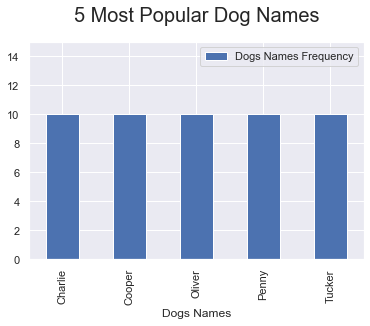

In [95]:
dog_name = twitter_df[twitter_df.dog_name != 'None']
dog_name_grouped = dog_name.groupby('dog_name').count()[['tweet_id']]
dog_name_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
dog_name_grouped.query('name_count >= 10').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=15)
plt.title("5 Most Popular Dog Names",{'fontsize': 20},pad=20)
plt.xlabel("Dogs Names")
plt.legend(["Dogs Names Frequency"])

##### Tucker, Penny, Olivier, Cooper and Charlie are the most popular dog name in the twitter dataset.

### Question 2: Which dog tweet was the most favorited?

In [72]:
twitter_df[twitter_df.favorite_count == twitter_df.favorite_count.max()]

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,id_str,display_text_range,retweet_count,favorite_count,breed
836,744234799360020481,2016-06-18 18:26:18+00:00,iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,None,doggo,744234799360020480,"[0, 91]",70314,144201,Labrador_retriever


##### The most favorited dog tweet is the tweet with the tweet_id 744234799360020481. It was posted on the 18th of June, 2016 at 18:26 pm. The dog stage is doggo and the dog breed is Labrador_retriever. It was favorited 144201 times.

### Question 3: Which dog tweet is the most retweeted?

In [73]:
most_retweets = twitter_df[twitter_df.retweet_count == twitter_df.retweet_count.max()]

most_retweets

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,id_str,display_text_range,retweet_count,favorite_count,breed
836,744234799360020481,2016-06-18 18:26:18+00:00,iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,None,doggo,744234799360020480,"[0, 91]",70314,144201,Labrador_retriever


#### The tweet, is also interestingly, the most retweeted tweet with 70,316 retweets.

I will like to take a look at what that particular tweet says!

In [74]:
most_retweets.text.tolist()

["Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"]

### Question 4: What are the most common sources of dog tweets?

In [75]:
tweet_sources = twitter_df.groupby('source').count()[['tweet_id']]
tweet_sources.rename(columns={'tweet_id': 'source_count'}, inplace=True)
tweet_sources['source_percentage'] = tweet_sources.source_count / tweet_sources.source_count.sum() * 100
tweet_sources['source_percentage']

source
Tweetback       0.486145
Twitter_web     1.458435
iPhone         98.055421
Name: source_percentage, dtype: float64

<AxesSubplot:ylabel='source_percentage'>

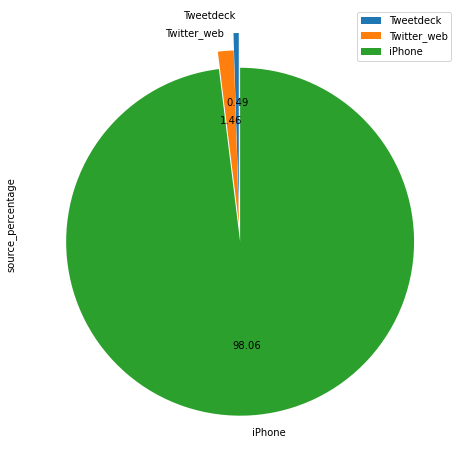

In [76]:
pieLabels = ['Tweetdeck', 'Twitter_web', 'iPhone']

pieLegend = ['Tweetdeck', 'Twitter_web', 'iPhone']

tweet_sources['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.2f',labels=pieLabels,startangle=90,
                                            legend=pieLegend,
                                            explode=(0.1,0,0.1))

##### As seen above, Iphone is the most popular source of dog tweets.

### Question 5: Which dog breeds were the most retweeted?

<AxesSubplot:xlabel='breed'>

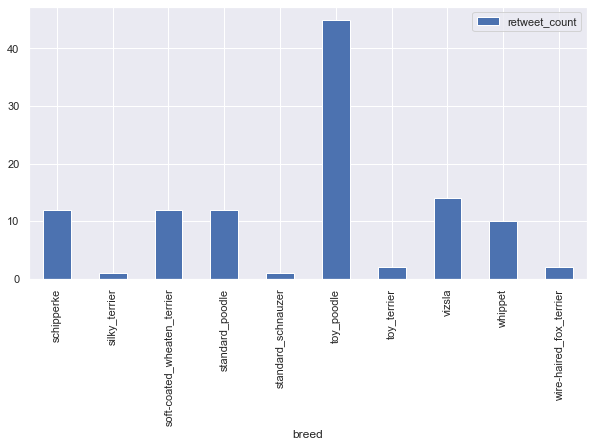

In [88]:
breed_retweet = twitter_df.groupby('breed').count()[['retweet_count']]

breed_retweet.tail(10).plot.bar(figsize=(10,5))

##### Toy poodle breed had the highest retweet counts of all the dog breeds tweeted by weRate Tiwtter account with about 47 counts.

### Question 6: Which dog stage had the most favorite counts?

<AxesSubplot:xlabel='dog_stage'>

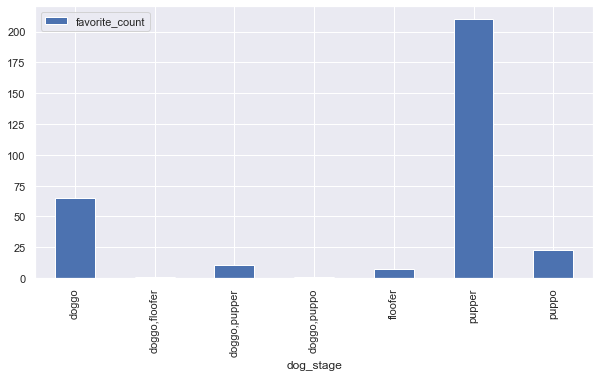

In [91]:
stage_retweet = twitter_df.groupby('dog_stage').count()[['favorite_count']]

stage_retweet.tail(10).plot.bar(figsize=(10,5))

#### Dogs at the Puppo stage had the highest favorite counts!

### Question 7: What are the dog breeds with the highest tweet ratings?

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

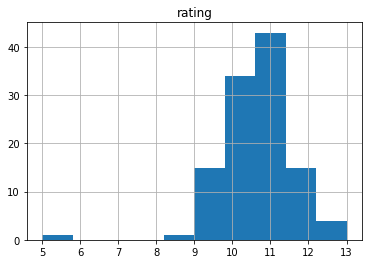

In [77]:
twitter_df['rating'] = (twitter_df.rating_numerator) / (twitter_df.rating_denominator)

breed_ratings = twitter_df.query('breed == breed')[['rating', 'breed']].groupby('breed').mean() * 10
breed_ratings.hist()

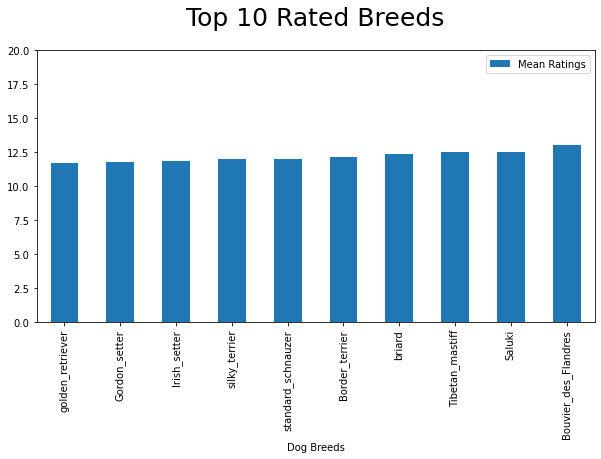

In [78]:
breed_ratings.sort_values(by=['rating']).tail(10).plot.bar(figsize=(10,5))
plt.ylim(top=20)
plt.title("Top 10 Rated Breeds",{'fontsize': 25},pad=25)
plt.xlabel("Dog Breeds")
plt.legend(["Mean Ratings"])

##### Bouvier_des_Flandres and Saluki are the highest rated dog breeds

### Question 8: Which dog breeds have the least rated tweets?

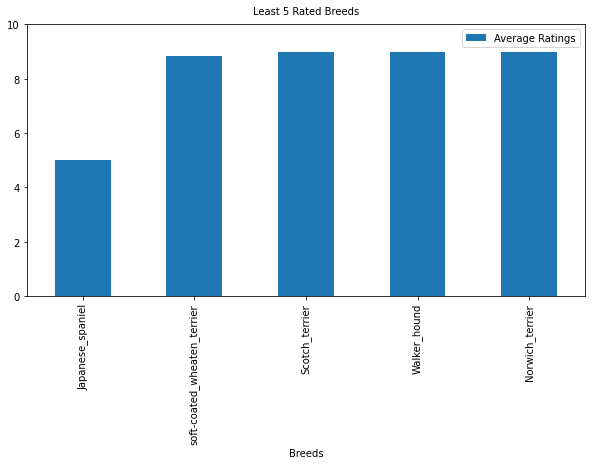

In [79]:
breed_ratings.sort_values(by=['rating']).head(5).plot.bar(figsize=(10,5))
plt.ylim(top=10)
plt.title("Least 5 Rated Breeds",{'fontsize': 10},pad=10)
plt.xlabel("Breeds")
plt.legend(["Average Ratings"])

#### Japanese_spaniel and soft_coated_wheaten_terrier are the least rated breeds

### Question 9: What is the most popular dog breed?

Text(0.5, 1.0, 'The Distribution of Dog Stages')

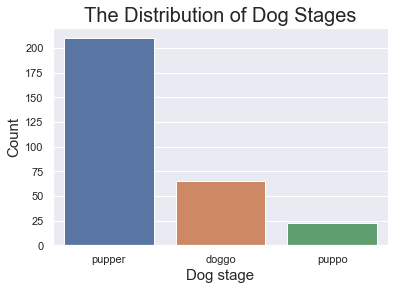

In [80]:
sns.set(style = 'darkgrid')
sorted_age = twitter_df['dog_stage'].value_counts().head(3).index
sns.countplot(data = twitter_df, x ='dog_stage', order = sorted_age, orient='h')
plt.xlabel('Dog stage', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('The Distribution of Dog Stages', fontsize=20)

### Pupper is by far the most popular dog stage!

### Question 10: What is the mean rating in the dataset?

In [81]:
twitter_df.rating.describe()

count    2057.000000
mean        1.165319
std         4.001623
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

#### A mean rating of 1.17 indicates that the dog tweets from @weRatedogs Twitter account had really good ratings. However, perhaps due to compilation error on the part of the compiler, a max rating of 177.6 indicates that there are small errors in the rating compilation.

In [100]:
twitter_df.retweet_count.describe()

count     2057.000000
mean      2351.222654
std       4110.826343
min         11.000000
25%        500.000000
50%       1110.000000
75%       2706.000000
max      70314.000000
Name: retweet_count, dtype: float64

In [101]:
twitter_df.favorite_count.describe()

count      2057.000000
mean       7411.801653
std       11215.949260
min           0.000000
25%        1402.000000
50%        3240.000000
75%        9236.000000
max      144201.000000
Name: favorite_count, dtype: float64